## Linear Regression
-  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
-  Predict Y (Dependent Variable) on the basis of Xs (Independent Variables)
-  Y : Continous eg salary, age, increment
-  Xs : can be continous or discrete eg. gender, age, salary, experience in yrs etc
-  In this mtcars data set : Y (mpg) predict on the basis of Xs (wt, hp, gear)
-  Steps
    -  from sklearn.linear_model import LinearRegression
    -  model = LinearRegression().fit(X,y)
    -  r_sq = model.score(X, y)
    -  y_pred = model.predict(X)
    -  Y_pred(new) = model.predict(X new)

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [ ]:
#data
mt = data('mtcars')
print(mt.shape, mt.columns,'\n')
print(mt.dtypes, '\n', mt[['mpg','wt','hp','gear']].head())

## Sklearn 
### Simple Linear Regression

In [36]:
from sklearn.model_selection import train_test_split  #split
from sklearn.linear_model import LinearRegression  #model

In [37]:
df = mt[['mpg','wt']].copy()
df.head(2)

,mpg,wt
Mazda RX4,21.0,2.620
Mazda RX4 Wag,21.0,2.875


In [38]:
df.corr()
X = df.drop(columns='wt')
y = df.wt
print(X.shape, y.shape)

(32, 1) (32,)


In [39]:
model = LinearRegression().fit(X, y)
model

LinearRegression()

In [40]:
print('R2 ',model.score(X,y))
# 75% of the variation in y is dependent on Xs which are in the model

R2  0.7528327936582646


In [41]:
y_pred = model.predict(X).round(2)
y_pred

array([3.09, 3.09, 2.84, 3.03, 3.41, 3.5 , 4.03, 2.61, 2.84, 3.34, 3.54,
       3.74, 3.61, 3.91, 4.58, 4.58, 3.98, 1.48, 1.77, 1.27, 3.02, 3.86,
       3.91, 4.17, 3.34, 2.2 , 2.38, 1.77, 3.82, 3.27, 3.93, 3.03])

In [42]:
#y.tolist()
32 * .8

25.6

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  #rows=32*.8, 1(wt)

(25, 1) (7, 1) (25,) (7,)


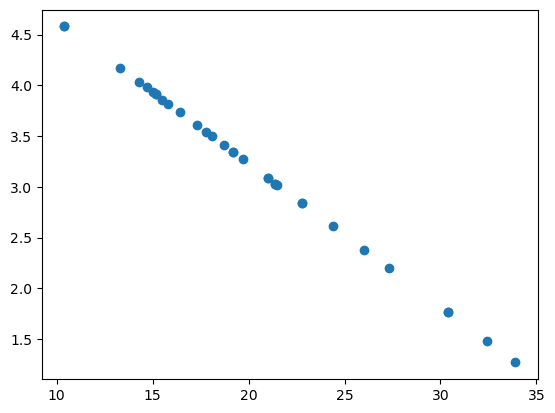

In [44]:
plt.scatter(x=X, y=y_pred)

## Multiple Linear Regression
- DV - multiple IVs

In [45]:
data1 = mt[['mpg','wt','hp','gear']].copy()
X = data1.drop(columns='mpg')  #predict mpg - Y so drop from X
y = data1.mpg  # Dep Variable
print('IVs - ', X.shape, X.columns, ': DVs - ', y.shape,  y.name)
#rows/cols of X, y, ; names of columsn in X, y

IVs -  (32, 3) Index(['wt', 'hp', 'gear'], dtype='object') : DVs -  (32,) mpg


In [46]:
print(X.head(3), '\n', y.head(3))

                  wt   hp  gear
Mazda RX4      2.620  110     4
Mazda RX4 Wag  2.875  110     4
Datsun 710     2.320   93     4 
 Mazda RX4        21.0
Mazda RX4 Wag    21.0
Datsun 710       22.8
Name: mpg, dtype: float64


In [47]:
data1.head()

,mpg,wt,hp,gear
Mazda RX4,21.0,2.620,110,4
Mazda RX4 Wag,21.0,2.875,110,4
Datsun 710,22.8,2.320,93,4
Hornet 4 Drive,21.4,3.215,110,3
Hornet Sportabout,18.7,3.440,175,3


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [49]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25, 3) (7, 3) (25,) (7,)


In [50]:
reg1 = LinearRegression().fit(X_train,y_train)

In [51]:
print('R2 ', reg1.score(X,y))
#83% of variation in Y (mpg) is dependent on X (wt, hp, gear)

R2  0.8343748866225498


In [52]:
print('Coefficients ', reg1.coef_)
print(X_train.columns)
#if u increase wt by 1 unit, mpg will decrease by 3 units (-3)

Coefficients  [-3.02600904 -0.03907936  0.94247563]
Index(['wt', 'hp', 'gear'], dtype='object')


In [53]:
reg1.intercept_

32.109450064221186

-   mpg = 32 + -3 * wt + -.03 * hp + .94 * gear 

In [54]:
y_pred = reg1.predict(X_train).round(2)
print('Predict MPG for given X values \n ', y_pred)

Predict MPG for given X values 
  [18.42 15.59 13.74 28.96 17.69 20.91 16.46  9.77 11.04 23.69 20.66 10.12
 27.44 23.65 22.88 18.68 20.66 27.79 26.64 14.56 21.6  16.91 25.22 16.46
 12.93]


In [55]:
print(X.head(2), '\n')
print(X.describe())  #sample values between min and max of each variable

                  wt   hp  gear
Mazda RX4      2.620  110     4
Mazda RX4 Wag  2.875  110     4 

              wt          hp       gear
count  32.000000   32.000000  32.000000
mean    3.217250  146.687500   3.687500
std     0.978457   68.562868   0.737804
min     1.513000   52.000000   3.000000
25%     2.581250   96.500000   3.000000
50%     3.325000  123.000000   4.000000
75%     3.610000  180.000000   4.000000
max     5.424000  335.000000   5.000000


In [70]:
y_test_pred = reg1.predict(X_test).round(2)
print('Predict MPG for from test Data ', y_test_pred)

Predict MPG for from test Data  [23.8  23.21 20.36 26.79 22.63 27.83 16.62]


In [85]:
#print(X_test)
#print(y_test)
#print(y_test_pred)
pd.concat([X_test.reset_index(), y_test.reset_index(), pd.Series(y_test_pred)], axis=1, ignore_index=True)
#pd.concat([X_test, y.reset_index(), pd.Series(y_test_pred)],axis=1, ignore_index=True).head()
#print(32 + -3 * 2.78 + -.03 * 109 + .94 * 4)
#col 5 - actual mpg, col 6- predicted mpg

,0,1,2,3,4,5,6
0,Merc 240D,3.190,62,4,Merc 240D,24.4,23.80
1,Volvo 142E,2.780,109,4,Volvo 142E,21.4,23.21
2,Valiant,3.460,105,3,Valiant,18.1,20.36
3,Porsche 914-2,2.140,91,5,Porsche 914-2,26.0,26.79
4,Merc 230,3.150,95,4,Merc 230,22.8,22.63
5,Lotus Europa,1.513,113,5,Lotus Europa,30.4,27.83
6,Merc 450SL,3.730,180,3,Merc 450SL,17.3,16.62


In [81]:
print(y_test, y_test_pred)

Merc 240D        24.4
Volvo 142E       21.4
Valiant          18.1
Porsche 914-2    26.0
Merc 230         22.8
Lotus Europa     30.4
Merc 450SL       17.3
Name: mpg, dtype: float64 [23.8  23.21 20.36 26.79 22.63 27.83 16.62]


In [82]:
print(type(y_test), type(y_test_pred))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [86]:
# Combine as DF
pd.concat([y_test.reset_index(), pd.Series(y_test_pred)],axis=1, ignore_index=True)

,0,1,2
0,Merc 240D,24.4,23.80
1,Volvo 142E,21.4,23.21
2,Valiant,18.1,20.36
3,Porsche 914-2,26.0,26.79
4,Merc 230,22.8,22.63
5,Lotus Europa,30.4,27.83
6,Merc 450SL,17.3,16.62


In [87]:
from sklearn.metrics import mean_squared_error
#pd.concat([y.reshape(-1,1), y_pred.reshape(-1,1)])

#there is difference between actual (1) and predicted values(2), which show accuracy of the model ?

In [88]:
print(y_test)
print(y_test_pred)

Merc 240D        24.4
Volvo 142E       21.4
Valiant          18.1
Porsche 914-2    26.0
Merc 230         22.8
Lotus Europa     30.4
Merc 450SL       17.3
Name: mpg, dtype: float64
[23.8  23.21 20.36 26.79 22.63 27.83 16.62]


In [91]:
mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)
print('Mean Squared Error ', mse.round(2), ' : Root Mean Squared Error - ', rmse.round(2))
#rmse should be as less as possible

Mean Squared Error  2.35  : Root Mean Squared Error -  1.53


## Predict for New Set of Values of Car

In [92]:
#create new set of values
newData = pd.DataFrame({'wt':[3,5,6], 'hp':[200, 100,300], 'gear':[5,4,3]})
newData

,wt,hp,gear
0,3,200,5
1,5,100,4
2,6,300,3


In [93]:
print('Predict MPG for new Set of Data ', reg1.predict(newData).round(2))

Predict MPG for new Set of Data  [19.93 16.84  5.06]


# Stats Model
https://www.statsmodels.org/stable/regression.html

In [94]:
#different library
from statsmodels.formula.api import ols

In [95]:
data1 = mt[['mpg','wt','hp','gear']].copy()
X = data1.drop(columns='mpg')  #predict mpg - Y so drop from X
y = data1.mpg  # Dep Variable
print('IVs - ', X.shape, X.columns, ': DVs - ', y.shape,  y.name)
#rows/cols of X, y, ; names of columsn in X, y

IVs -  (32, 3) Index(['wt', 'hp', 'gear'], dtype='object') : DVs -  (32,) mpg


In [96]:
reg2 = ols("mpg ~ wt + hp + gear", data=data1).fit()

In [97]:
#skipping the splitting of data into train and test

In [98]:
y_predOLS  = reg2.predict().round(2)
print(' Predicted Values of MPG from OLS technique \t', y_predOLS)

 Predicted Values of MPG from OLS technique 	 [23.67 22.85 25.25 20.75 17.64 20.15 14.64 23.61 22.53 20.57 20.57 15.44
 16.52 16.36 10.74  9.82  9.52 26.63 29.02 27.83 23.62 18.3  18.57 13.78
 16.34 27.48 26.92 28.12 17.26 21.82 13.37 23.19]


In [99]:
print('Predict MPG for new Set of Data from OLS\n', reg2.predict(newData).round(2))

Predict MPG for new Set of Data from OLS
 0    20.16
1    16.43
2     4.85
dtype: float64


In [100]:
print('Summary of the Model ', reg2.summary())
#understand : R2, Adjust R2, AIC, p-Value of Coefficients, F-Stats

Summary of the Model                              OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     47.31
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           4.33e-11
Time:                        19:22:25   Log-Likelihood:                -73.526
No. Observations:                  32   AIC:                             155.1
Df Residuals:                      28   BIC:                             160.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.0137      4.6

<Axes: >

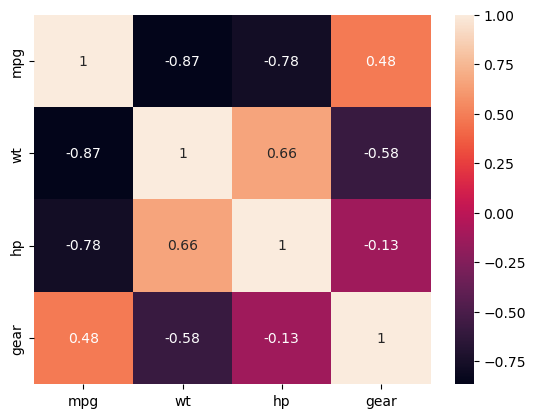

In [102]:
#correlation map
sns.heatmap(data1.corr(), annot=True)

In [ ]:
# now try with any data set using above Linear Regression

### end here